In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Statistics Exercise
## Statistical Distributions. Properties of distributions. Applications of Probability and Statistics in Computer Science

### Problem 1. Plotting a Single Distribution. Digits in $\pi$ and $e$
We expect that the decimal digits in $\pi$ and $e$ will be randomly distributed and there's no reason for any digit to dominate over others. Let's verify this.

Using an algorithm, the first 10 004 digits of $\pi$ and $e$ were generated:
$$
\pi = 3.(141592 \dots 5678)5667
$$
$$
e = 2.(718281 \dots 6788)5674
$$

The 10 000 digits in brackets were counted. You can see the results in `digits.dat`. Each column corresponds to one digit from 0 to 9. The first row is for $\pi$ and the second row is for $e$.

How are these digits distributed? Are the two distributions different?

**Note:** The dataset is **not properly formatted** to work easily. You can transpose it. Now, digit counts will be in rows and variables - in columns. 
```python
digits = pd.read_table("digits.dat", header = None).T
```

You can also specify column names like this:
```python
digits.columns = ["pi", "e"]
```

Also note that **we are not creating the histogram of the distribution**. We already have the counts, we need to plot them. In a sense, the histogram has already been calculated.

To do this, we can create a "bar chart" (using `plt.bar()`). We have to provide values for the x-axis and y-axis. For the x-axis, we have the numbers 0 through 9 (we can use the *index* of the dataset like this: `digits.index`). For the y-axis, we need to plot the digit counts directly.

We can see that even the simplest datasets sometimes need a bit of preprocessing. This is always the case when we're working with data.

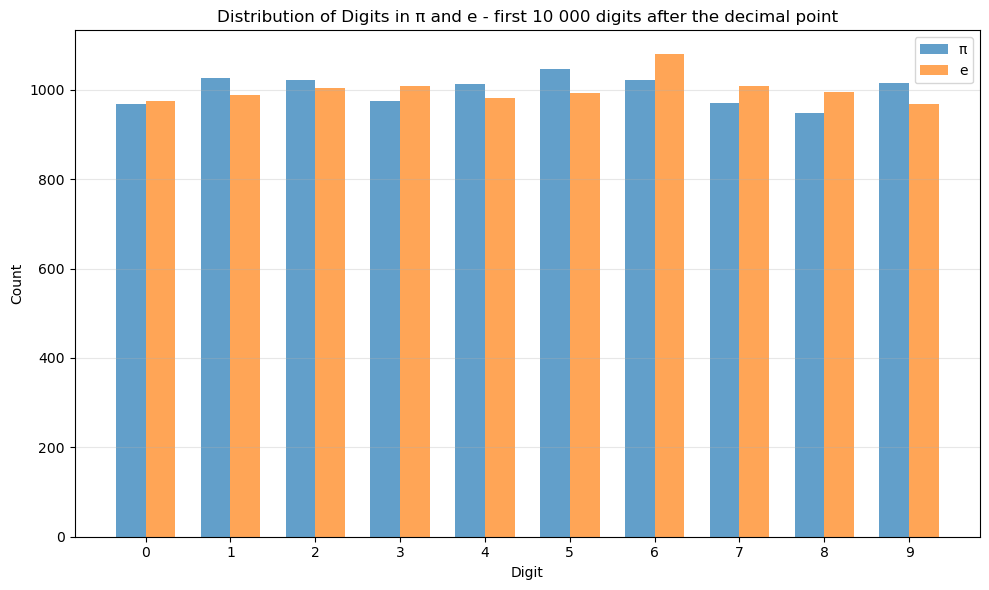

Counts for π:
0     968
1    1026
2    1021
3     974
4    1012
5    1046
6    1021
7     970
8     948
9    1014
Name: pi, dtype: int64
Mean count for π: 1000.0
Standard deviation for π: 32.2

Counts for e:
0     974
1     989
2    1004
3    1008
4     982
5     992
6    1079
7    1008
8     996
9     968
Name: e, dtype: int64
Mean count for e: 1000.0
Standard deviation for e: 30.9

Difference in means: 0.0


In [3]:
digits = pd.read_table("digits.dat", header=None).T
digits.columns = ["pi", "e"]

plt.figure(figsize=(10, 6))

x_positions = digits.index
width = 0.35
plt.bar(x_positions - width/2, digits["pi"], width, label = 'π', alpha=0.7)
plt.bar(x_positions + width/2, digits["e"], width, label = 'e', alpha=0.7)

plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in π and e - first 10 000 digits after the decimal point')
plt.xticks(x_positions)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Counts for π:")
print(digits["pi"])
print(f"Mean count for π: {digits['pi'].mean():.1f}")
print(f"Standard deviation for π: {digits['pi'].std():.1f}")

print("\nCounts for e:")
print(digits["e"]) 
print(f"Mean count for e: {digits['e'].mean():.1f}")
print(f"Standard deviation for e: {digits['e'].std():.1f}")

print(f"\nDifference in means: {abs(digits['pi'].mean() - digits['e'].mean()):.1f}")

Let's try something else. Scientists have measured the percentage of silica ($\text{SiO}_2$, sand / glass) for 22 meteors. You can find it in `silica.dat`. How are these distributed? What is a "typical" percentage? Is there such percentage at all?

Print the mean, standard deviation (you can use the biased or unbiased formula), skewness and kurtosis of the distribution. What do these numbers tell you? How do they relateto the shape of the distribution? Can you characterize the distribution better? (An idea would be to characterize different parts of it on their own, as if they're different distributions.)

Silica Distribution Statistics:
Sample size: 22
Mean: 29.17%
Median: 29.02%
Range: 20.77% to 34.82%
Standard deviation (unbiased): 4.29%
Standard deviation (biased): 4.19%
Skewness: -0.415
Kurtosis: -0.988

Interpretation of Statistics:
Skewness (-0.415): approximately symmetric
Kurtosis (-0.988): flatter than normal with lighter tails




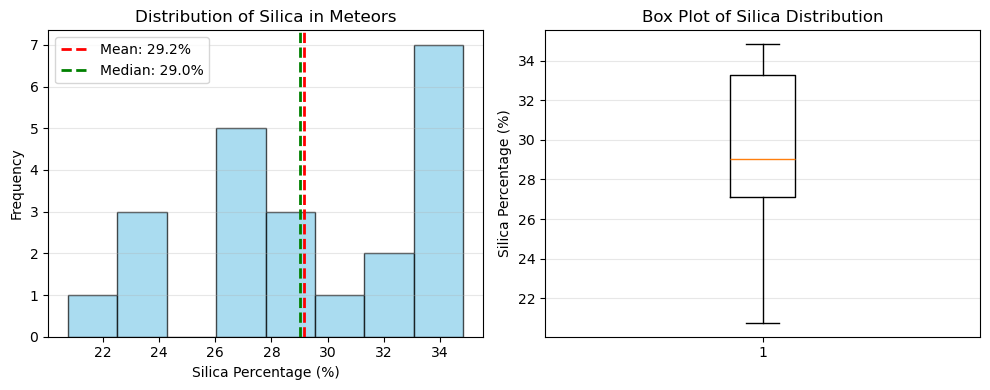


Distribution analysis:
Sorted values:
 1:  20.8%
 2:  22.6%
 3:  22.7%
 4:  23.0%
 5:  26.4%
 6:  27.1%
 7:  27.3%
 8:  27.3%
 9:  27.6%
10:  27.8%
11:  28.7%
12:  29.4%
13:  30.2%
14:  31.9%
15:  32.9%
16:  33.2%
17:  33.3%
18:  33.4%
19:  33.5%
20:  33.8%
21:  34.0%
22:  34.8%

Quartile analysis:
Q1 (25th percentile): 27.1%
Q2 (50th percentile/median): 29.0%
Q3 (75th percentile): 33.3%
Interquartile Range (IQR): 6.1%

Subroup analysis:
No obvious natural splits detected in the data.


In [4]:
silica = pd.read_table("silica.dat", header = None)
silica_values = silica.iloc[:, 0]

mean_val = silica_values.mean()
std_val = silica_values.std()  # Default is unbiased (ddof=1)
std_biased = silica_values.std(ddof=0)  # Biased version
skewness = stats.skew(silica_values)
kurt = stats.kurtosis(silica_values)

# --------------------------------------------
print("Silica Distribution Statistics:")
print("=" * 40)
print(f"Sample size: {len(silica_values)}")
print(f"Mean: {mean_val:.2f}%")
print(f"Median: {silica_values.median():.2f}%")
print(f"Range: {silica_values.min():.2f}% to {silica_values.max():.2f}%")
print(f"Standard deviation (unbiased): {std_val:.2f}%")
print(f"Standard deviation (biased): {std_biased:.2f}%")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurt:.3f}")

# -------------------------------------------------
print("\nInterpretation of Statistics:")
print("=" * 40)

if abs(skewness) < 0.5:
    skew_interp = "approximately symmetric"
elif skewness > 0.5:
    skew_interp = "right-skewed - tail extends toward higher values"
else:
    skew_interp = "left-skewed - tail extends toward lower values"

if abs(kurt) < 0.5:
    kurt_interp = "similar to normal distribution"
elif kurt > 0.5:
    kurt_interp = "more peaked than normal with heavier tails"
else:
    kurt_interp = "flatter than normal with lighter tails"

print(f"Skewness ({skewness:.3f}): {skew_interp}")
print(f"Kurtosis ({kurt:.3f}): {kurt_interp}")
print("\n")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(silica_values, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}%')
ax1.axvline(silica_values.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {silica_values.median():.1f}%')
ax1.set_xlabel('Silica Percentage (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Silica in Meteors')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Box plot
ax2.boxplot(silica_values, vert=True)
ax2.set_ylabel('Silica Percentage (%)')
ax2.set_title('Box Plot of Silica Distribution')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Check for potential subgroups/multimodality
print("\nDistribution analysis:")
print("=" * 40)

# Sort values for easier analysis
sorted_values = np.sort(silica_values)
print("Sorted values:")
for i, val in enumerate(sorted_values):
    print(f"{i+1:2d}: {val:5.1f}%")

# Look for potential gaps or clusters
gaps = []
for i in range(1, len(sorted_values)):
    gap = sorted_values[i] - sorted_values[i-1]
    if gap > std_val:  # Large gap (more than 1 std dev)
        gaps.append((i, gap, sorted_values[i-1], sorted_values[i]))

if gaps:
    print(f"\nLarge gaps (>{std_val:.1f}%) found:")
    for i, gap, val1, val2 in gaps:
        print(f"  Gap of {gap:.1f}% between {val1:.1f}% and {val2:.1f}%")

# Quartile analysis
q1 = silica_values.quantile(0.25)
q2 = silica_values.quantile(0.5)  # median
q3 = silica_values.quantile(0.75)
iqr = q3 - q1

print(f"\nQuartile analysis:")
print(f"Q1 (25th percentile): {q1:.1f}%")
print(f"Q2 (50th percentile/median): {q2:.1f}%")
print(f"Q3 (75th percentile): {q3:.1f}%")
print(f"Interquartile Range (IQR): {iqr:.1f}%")

# Attempt to identify subgroups
print(f"\nSubroup analysis:")
print("=" * 40)

# Simple approach: split at natural breaks
if len(gaps) > 0:
    print("Potential subgroups based on large gaps:")
    # Split at the largest gap
    largest_gap = max(gaps, key=lambda x: x[1])
    split_point = largest_gap[2]  # Value before the gap
    
    group1 = silica_values[silica_values <= split_point]
    group2 = silica_values[silica_values > split_point]
    
    print(f"Group 1 (≤{split_point:.1f}%): {len(group1)} meteors")
    print(f"  Mean: {group1.mean():.1f}%, Std: {group1.std():.1f}%")
    print(f"  Range: {group1.min():.1f}% to {group1.max():.1f}%")
    
    print(f"Group 2 (>{split_point:.1f}%): {len(group2)} meteors")
    print(f"  Mean: {group2.mean():.1f}%, Std: {group2.std():.1f}%")
    print(f"  Range: {group2.min():.1f}% to {group2.max():.1f}%")
else:
    print("No obvious natural splits detected in the data.")


### Problem 2. Categorical Variables. Comparing Categories
In addition to numeric variables (like age and salary), in statistics we also use **categorical variables**. These are descriptions of quality (as opposed to quantity). Such variables can be gender, smoker / non-smoker, results of a medical study (healthy / not healthy), colors (red, green, blue), etc. To plot values of categories, we use *bar charts*. Since category names can be long, it's sometimes useful to plot the lines horizontally.

<p style="color: #d9534f"><strong>There is a very significant difference between histograms and bar charts. Histograms are used to plot the frequency distribution of one numeric variable. Bar charts are used to plot categorical variables - how each value compares to other values.</strong></p>

The dataset `budget.dat` contains the figures for the eight main items in the US budget for 1978 and 1979 in billions
of dollars.

Display the two budgets separately. Use `xlabel()` (or `ylabel()` if your plot is horizontal) to write the names of each category. You can use [this](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) and [this](https://matplotlib.org/examples/pylab_examples/barchart_demo2.html) examples as a guide.

Create another variable which shows the difference in budget $\Delta b = b_{1979} - b_{1978}$. Add this variable to the dataset (find out how). Plot it. How does the budget differ?

Since the numbers are different, a better comparison will be if we convert them to percentages of the total budget. Create two more variables for 1978 and 1979 and add them to the dataset. Plot these now. Also plot the difference in percentage, like you did before.

Original budget data (billions of dollars):
                     1978   1979
Category                        
Military spending   107.6  117.8
Social security     103.9  115.1
Health care          44.3   49.7
Debt service         43.8   49.0
Welfare              43.7   44.9
Education            27.5   30.4
Energy               19.9   21.8
Veteran's benefits   18.9   19.3



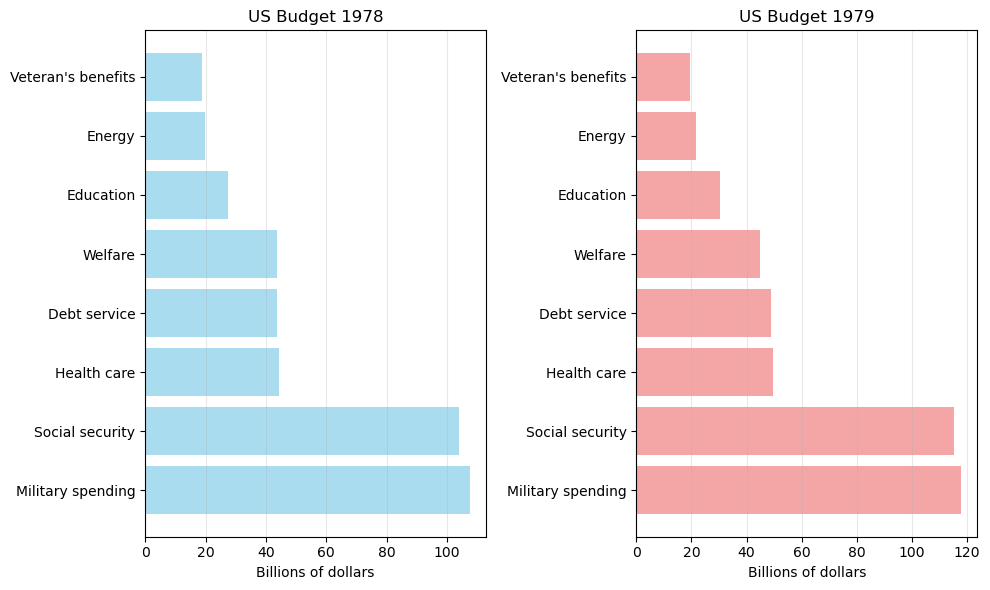

Budget with difference (Δb = b1979 - b1978):
                     1978   1979  difference
Category                                    
Military spending   107.6  117.8        10.2
Social security     103.9  115.1        11.2
Health care          44.3   49.7         5.4
Debt service         43.8   49.0         5.2
Welfare              43.7   44.9         1.2
Education            27.5   30.4         2.9
Energy               19.9   21.8         1.9
Veteran's benefits   18.9   19.3         0.4



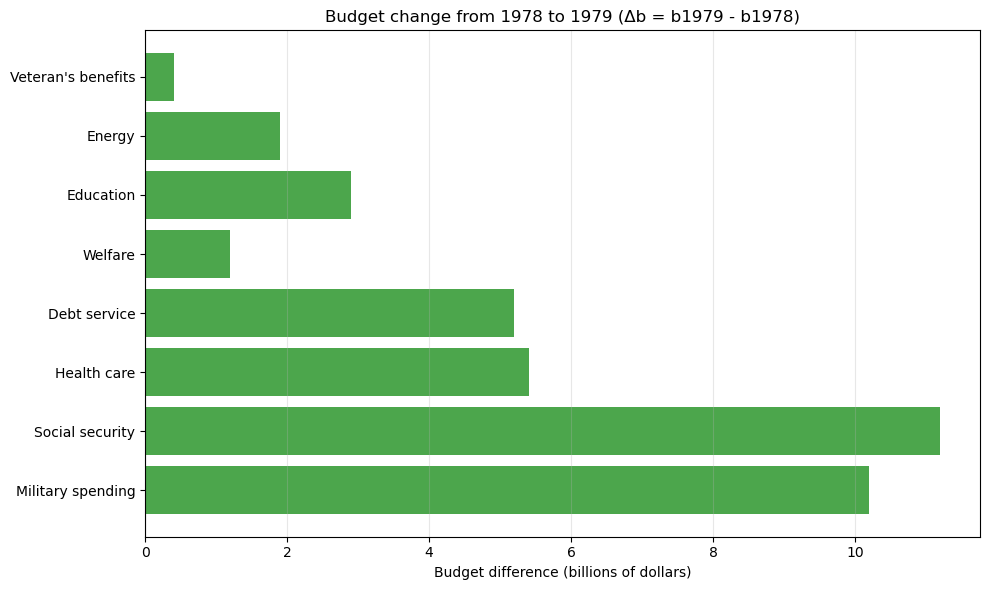

Budget with percentages:
                     1978   1979  difference   1978_pct   1979_pct
Category                                                          
Military spending   107.6  117.8        10.2  26.269531  26.294643
Social security     103.9  115.1        11.2  25.366211  25.691964
Health care          44.3   49.7         5.4  10.815430  11.093750
Debt service         43.8   49.0         5.2  10.693359  10.937500
Welfare              43.7   44.9         1.2  10.668945  10.022321
Education            27.5   30.4         2.9   6.713867   6.785714
Energy               19.9   21.8         1.9   4.858398   4.866071
Veteran's benefits   18.9   19.3         0.4   4.614258   4.308036



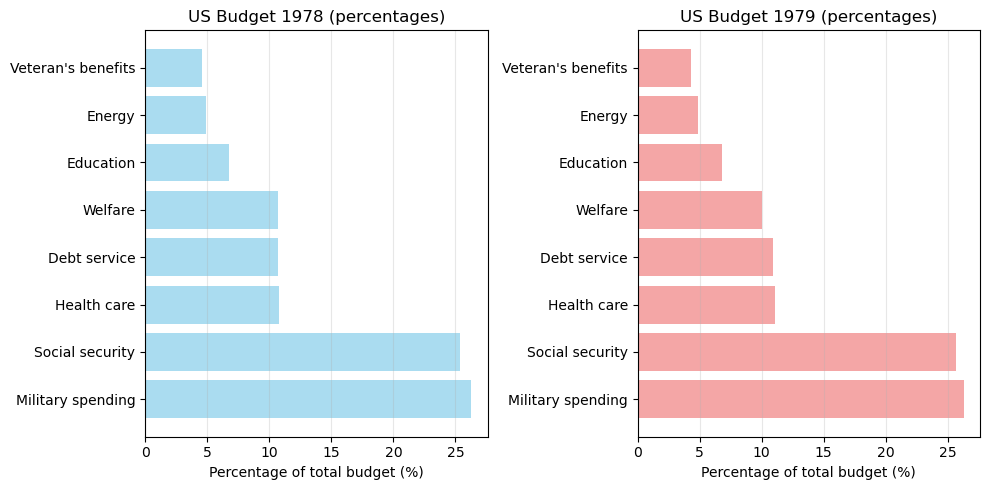

Complete budget analysis (rounded):
                     1978   1979  difference  1978_pct  1979_pct  \
Category                                                           
Military spending   107.6  117.8        10.2     26.27     26.29   
Social security     103.9  115.1        11.2     25.37     25.69   
Health care          44.3   49.7         5.4     10.82     11.09   
Debt service         43.8   49.0         5.2     10.69     10.94   
Welfare              43.7   44.9         1.2     10.67     10.02   
Education            27.5   30.4         2.9      6.71      6.79   
Energy               19.9   21.8         1.9      4.86      4.87   
Veteran's benefits   18.9   19.3         0.4      4.61      4.31   

                    pct_difference  
Category                            
Military spending             0.03  
Social security               0.33  
Health care                   0.28  
Debt service                  0.24  
Welfare                      -0.65  
Education               

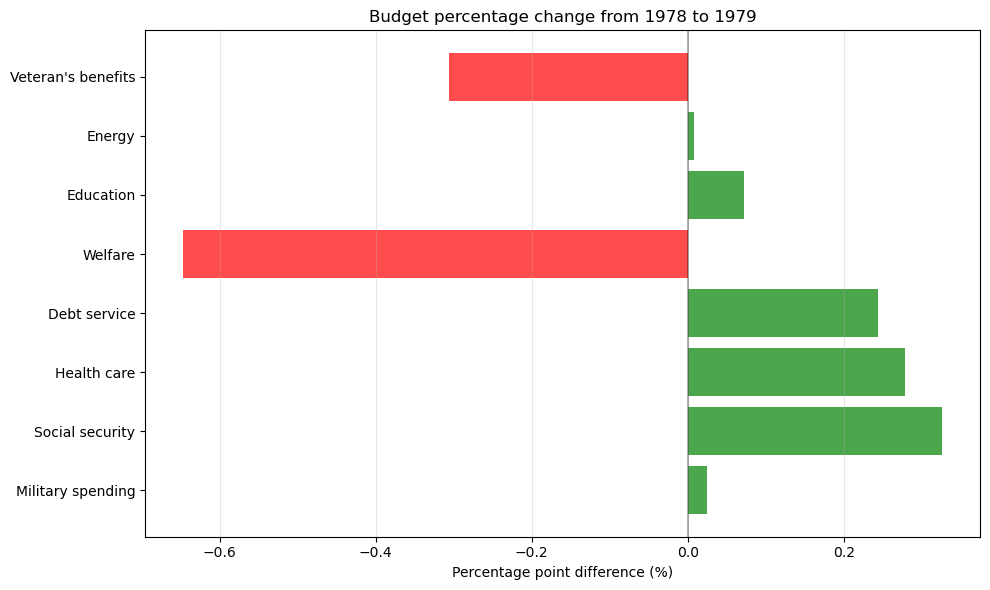

BUDGET SUMMARY:
Total budget 1978: $409.6 billion
Total budget 1979: $448.0 billion
Overall increase: $38.4 billion (9.4%)



In [15]:
budget = pd.read_table("budget.dat", header=0, index_col=0)

# Print original budget data
print("Original budget data (billions of dollars):")
print(budget)
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.barh(budget.index, budget['1978'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Billions of dollars')
ax1.set_title('US Budget 1978')
ax1.grid(axis='x', alpha=0.3)

ax2.barh(budget.index, budget['1979'], color = 'lightcoral', alpha = 0.7)
ax2.set_xlabel('Billions of dollars')
ax2.set_title('US Budget 1979')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

budget['difference'] = budget['1979'] - budget['1978']
print("Budget with difference (Δb = b1979 - b1978):")
print(budget)
print()

plt.figure(figsize = (10, 6))
colors = ['green' if x >= 0 else 'red' for x in budget['difference']]
plt.barh(budget.index, budget['difference'], color=colors, alpha=0.7)
plt.xlabel('Budget difference (billions of dollars)')
plt.title('Budget change from 1978 to 1979 (Δb = b1979 - b1978)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

budget['1978_pct'] = (budget['1978'] / budget['1978'].sum()) * 100
budget['1979_pct'] = (budget['1979'] / budget['1979'].sum()) * 100

print("Budget with percentages:")
print(budget)
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.barh(budget.index, budget['1978_pct'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Percentage of total budget (%)')
ax1.set_title('US Budget 1978 (percentages)')
ax1.grid(axis='x', alpha=0.3)

ax2.barh(budget.index, budget['1979_pct'], color = 'lightcoral', alpha = 0.7)
ax2.set_xlabel('Percentage of total budget (%)')
ax2.set_title('US Budget 1979 (percentages)')
ax2.grid(axis = 'x', alpha = 0.3)

plt.tight_layout()
plt.show()

budget['pct_difference'] = budget['1979_pct'] - budget['1978_pct']

print("Complete budget analysis (rounded):")
print(budget.round(2))
print()

plt.figure(figsize = (10, 6))
colors = ['green' if x >= 0 else 'red' for x in budget['pct_difference']]
plt.barh(budget.index, budget['pct_difference'], color = colors, alpha = 0.7)
plt.xlabel('Percentage point difference (%)')
plt.title('Budget percentage change from 1978 to 1979')
plt.axvline(x = 0, color = 'black', linestyle = '-', alpha = 0.3)
plt.grid(axis = 'x', alpha = 0.3)
plt.tight_layout()
plt.show()

# 5. Summary
print("BUDGET SUMMARY:")
print("=" * 40)
print(f"Total budget 1978: ${budget['1978'].sum():.1f} billion")
print(f"Total budget 1979: ${budget['1979'].sum():.1f} billion")
print(f"Overall increase: ${budget['difference'].sum():.1f} billion ({((budget['1979'].sum()/budget['1978'].sum()-1)*100):.1f}%)")
print()


### Problem 3. Correlations between Variables. Alcohol and Tobacco Usage
The dataset `alcohol_tobacco.dat` shows the average weekly household spending, in British pounds, on tobacco products and alcoholic beverages for each of the 11 regions of Great Britain.

Create a scatter plot. Print the correlation coefficient. You can use the **correlation matrix** (find out how).

There's a major outlier. Which one is it?

Remove the outlier from the dataset (find out how). Calculate the correlation coefficient once again. It should be much higher.

This example is useful to show what an outlier is, and how an outlier can influence the results of an experiment.

**Note:** Be careful with outliers. Sometimes they indicate human error (e.g. human height 1588 cm is obviously wrong) but sometimes they indicate important patterns in the data. Should you remove, replace, or leave them is a difficult question and should be answered separately for each dataset.

Alcohol and Tobacco Usage data (British Pounds per week):
                  Alcohol  Tobacco
Region                            
North                6.47     4.03
Yorkshire            6.13     3.76
Northeast            6.19     3.77
East Midlands        4.89     3.34
West Midlands        5.63     3.47
East Anglia          4.52     2.92
Southeast            5.89     3.20
Southwest            4.79     2.71
Wales                5.27     3.53
Scotland             6.08     4.51
Northern Ireland     4.02     4.56



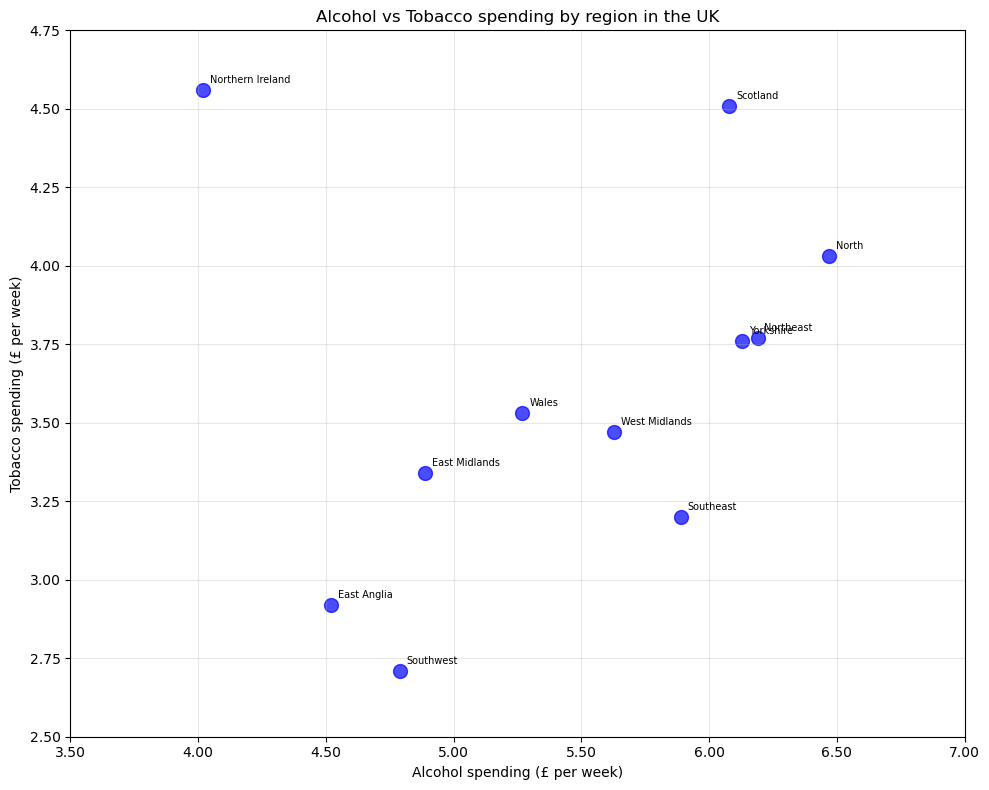

Correlation analysis:
Correlation Matrix:
         Alcohol  Tobacco
Alcohol   1.0000   0.2236
Tobacco   0.2236   1.0000

Correlation coefficient (Alcohol vs Tobacco): 0.2236
Alternative calculation (direct correlation between columns): 0.2236
NumPy calculation: 0.2236

Outlier identification:
Data points sorted by distance from the general trend:
Regions by distance from center:
Northern Ireland Alcohol:  4.02, Tobacco:  4.56, Distance:  1.71
East Anglia     Alcohol:  4.52, Tobacco:  2.92, Distance:  1.16
Southwest       Alcohol:  4.79, Tobacco:  2.71, Distance:  1.12
North           Alcohol:  6.47, Tobacco:  4.03, Distance:  1.11
Scotland        Alcohol:  6.08, Tobacco:  4.51, Distance:  1.10
Northeast       Alcohol:  6.19, Tobacco:  3.77, Distance:  0.76
Yorkshire       Alcohol:  6.13, Tobacco:  3.76, Distance:  0.70
East Midlands   Alcohol:  4.89, Tobacco:  3.34, Distance:  0.62
Southeast       Alcohol:  5.89, Tobacco:  3.20, Distance:  0.61
West Midlands   Alcohol:  5.63, Tobacco: 

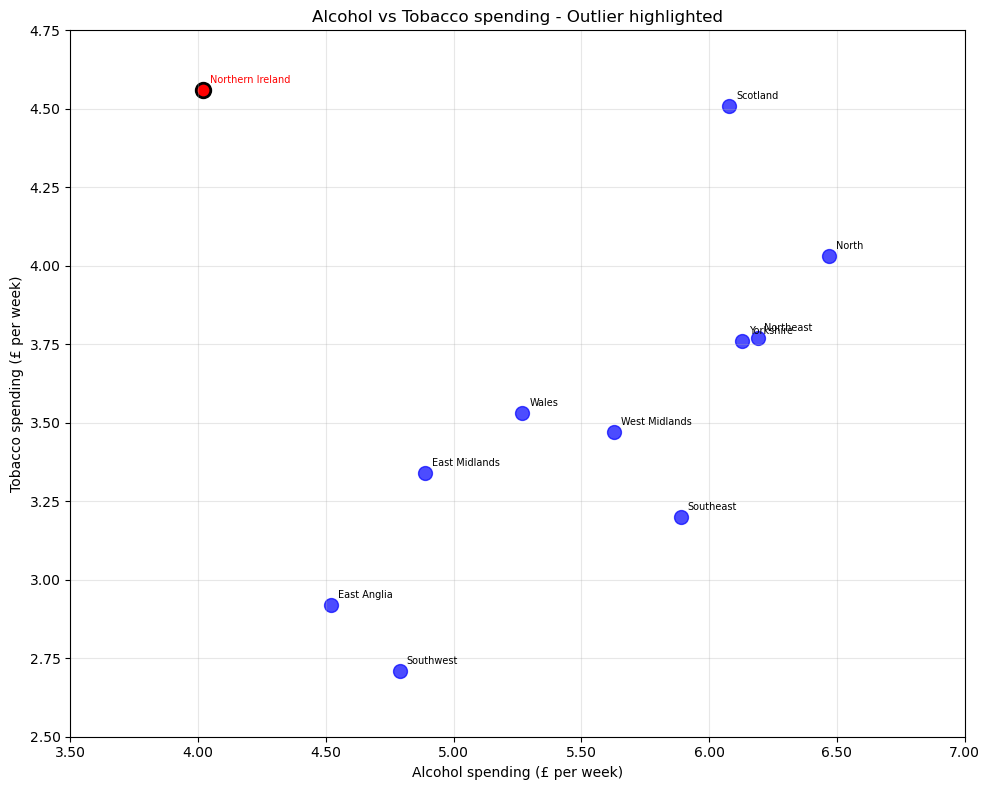

Removing outlier:
Original dataset shape: (11, 2)
Removing outlier: Northern Ireland
Dataset shape after removing outlier: (10, 2)

Dataset without outlier:
               Alcohol  Tobacco
Region                         
North             6.47     4.03
Yorkshire         6.13     3.76
Northeast         6.19     3.77
East Midlands     4.89     3.34
West Midlands     5.63     3.47
East Anglia       4.52     2.92
Southeast         5.89     3.20
Southwest         4.79     2.71
Wales             5.27     3.53
Scotland          6.08     4.51

Correlation analysis without outlier:
Correlation matrix (without outlier):
         Alcohol  Tobacco
Alcohol   1.0000   0.7843
Tobacco   0.7843   1.0000

Correlation coefficient without outlier: 0.7843
Correlation coefficient with outlier:    0.2236



In [34]:
data = pd.read_table("alcohol_tobacco.dat", header=0, index_col=0)

print("Alcohol and Tobacco Usage data (British Pounds per week):")
print(data)
print()

plt.figure(figsize = (10, 8))
plt.scatter(data['Alcohol'], data['Tobacco'], s = 100, alpha = 0.7, color='blue')

for i, region in enumerate(data.index):
    plt.annotate(region, (data['Alcohol'].iloc[i], data['Tobacco'].iloc[i]), 
                xytext = (5, 5), textcoords = 'offset points', fontsize = 7)

plt.xlabel('Alcohol spending (£ per week)')
plt.ylabel('Tobacco spending (£ per week)')
plt.title('Alcohol vs Tobacco spending by region in the UK')
plt.grid(True, alpha = 0.3)
xticks = plt.xticks()[0]
yticks = plt.yticks()[0]
plt.xticks(xticks, [f'{x:.2f}' for x in xticks])
plt.yticks(yticks, [f'{y:.2f}' for y in yticks])
plt.tight_layout()
plt.show()

correlation_matrix = data.corr()
correlation_coefficient = correlation_matrix.loc['Alcohol', 'Tobacco']

print("Correlation analysis:")
print("=" * 30)
print("Correlation Matrix:")
print(correlation_matrix.round(4))
print()
print(f"Correlation coefficient (Alcohol vs Tobacco): {correlation_coefficient:.4f}")

alt_corr = data['Alcohol'].corr(data['Tobacco'])
print(f"Alternative calculation (direct correlation between columns): {alt_corr:.4f}")

numpy_corr = np.corrcoef(data['Alcohol'], data['Tobacco'])[0, 1]
print(f"NumPy calculation: {numpy_corr:.4f}")
print()

print("Outlier identification:")
print("=" * 30)
print("Data points sorted by distance from the general trend:")

alcohol_mean = data['Alcohol'].mean()
tobacco_mean = data['Tobacco'].mean()

distances = []
for region in data.index:
    alcohol_val = data.loc[region, 'Alcohol']
    tobacco_val = data.loc[region, 'Tobacco']
    
    dist = np.sqrt((alcohol_val - alcohol_mean)**2 + (tobacco_val - tobacco_mean)**2)
    distances.append((region, alcohol_val, tobacco_val, dist))

distances.sort(key = lambda x: x[3], reverse = True)

print("Regions by distance from center:")
for region, alcohol, tobacco, dist in distances:
    print(f"{region:15} Alcohol: {alcohol:5.2f}, Tobacco: {tobacco:5.2f}, Distance: {dist:5.2f}")

outlier_region = distances[0][0]
print(f"\nPotential outlier: {outlier_region}")

plt.figure(figsize=(10, 8))
plt.scatter(data['Alcohol'], data['Tobacco'], s = 100, alpha = 0.7, color = 'blue')
outlier_alcohol = data.loc[outlier_region, 'Alcohol']
outlier_tobacco = data.loc[outlier_region, 'Tobacco']
plt.scatter(outlier_alcohol, outlier_tobacco, s = 110, color = 'red', 
           label = f'Outlier: {outlier_region}', edgecolor = 'black', linewidth = 2)

for i, region in enumerate(data.index):
    color = 'red' if region == outlier_region else 'black'
    plt.annotate(region, (data['Alcohol'].iloc[i], data['Tobacco'].iloc[i]), 
                xytext = (5, 5), textcoords = 'offset points', fontsize = 7, color = color)

plt.xlabel('Alcohol spending (£ per week)')
plt.ylabel('Tobacco spending (£ per week)')
plt.title('Alcohol vs Tobacco spending - Outlier highlighted')
plt.grid(True, alpha = 0.3)
xticks = plt.xticks()[0]
yticks = plt.yticks()[0]
plt.xticks(xticks, [f'{x:.2f}' for x in xticks])
plt.yticks(yticks, [f'{y:.2f}' for y in yticks])
plt.tight_layout()
plt.show()

print("Removing outlier:")
print("=" * 30)
print(f"Original dataset shape: {data.shape}")
print(f"Removing outlier: {outlier_region}")

data_no_outlier = data.drop(outlier_region)
print(f"Dataset shape after removing outlier: {data_no_outlier.shape}")
print()

print("Dataset without outlier:")
print(data_no_outlier)
print()

# 5. Calculate correlation without outlier
correlation_matrix_no_outlier = data_no_outlier.corr()
correlation_no_outlier = correlation_matrix_no_outlier.loc['Alcohol', 'Tobacco']

print("Correlation analysis without outlier:")
print("=" * 30)
print("Correlation matrix (without outlier):")
print(correlation_matrix_no_outlier.round(4))
print()
print(f"Correlation coefficient without outlier: {correlation_no_outlier:.4f}")
print(f"Correlation coefficient with outlier:    {correlation_coefficient:.4f}")
print()

### Problem 4. Simulation
Another prediction technique based on statistics, is simulation. This means recreating a system's parameters and running the experiment on a computer instead of running it in real life. Simulation can give us many insights. It's useful for prediction, "what-if" analysis, etc. It's also very useful if we have very limited "real experimentation" resources and want to narrow down our possibilities.

Let's see how we can simulate the profit of a grocery shop.

The profit is dependent on the customers and what items they buy. Let's assume that the number of customers per months follows a normal distribution with mean 500 and standard deviation 20.

$$ C \sim N(500, 20) $$

In the shop, there are several items, each having a different popularity. The popularity represents the probability of buying each item.

| Item               | Price | Popularity |
|--------------------|-------|------------|
| Bread              | 0.99  | 0.5        |
| Milk               | 2.89  | 0.15       |
| Eggs, dozen        | 2.00  | 0.2        |
| Chicken fillet, kg | 6.39  | 0.15       |

Each customer buys *exactly one* article at random. Each customer will generate an expected profit equal to $\text{price} . \text{popularity}$. Total profit: sum of all profits.

In [18]:
def get_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return 0.99
    elif n < 0.65:
        return 2.89
    elif n <= 0.85:
        return 2
    else:
        return 6.39

In [9]:
days = 1000
def run_simulation():
    profits = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_customer_profit() for c in np.arange(customers)])
        profits.append(profit)
    return profits

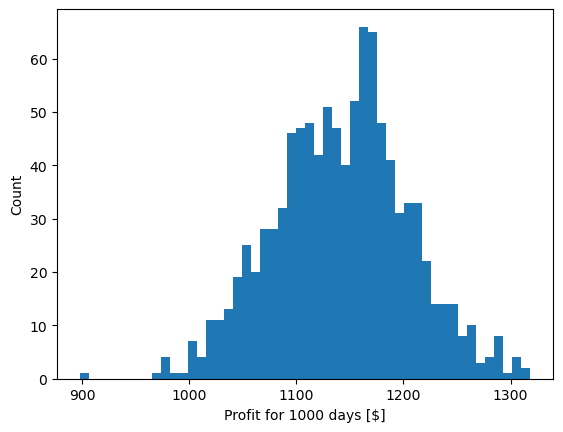

In [10]:
profits = run_simulation()
plt.hist(profits, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

Now we can answer questions like:
* What's the probability of profit less than \$1100? 
* What's the probability of profit between \$1300 and \$1400?

We can also change our model. Let's suppose now that one customer can take 1, 2 or 3 items, with probabilities 0.5, 0.3 and 0.2 respectively. The picked items are independent. How does this change the distribution?

In [11]:
def get_customer_profit_many_items(items = 1):
    customer_sum = sum([get_customer_profit() for i in range(items)])
    return customer_sum

def get_total_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return get_customer_profit_many_items(1)
    elif n <= 0.8:
        return get_customer_profit_many_items(2)
    else:
        return get_customer_profit_many_items(3)

In [12]:
def run_simulation_many_items():
    days = 1000
    profits_many_items = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_total_customer_profit() for c in np.arange(customers)])
        profits_many_items.append(profit)
    return profits_many_items

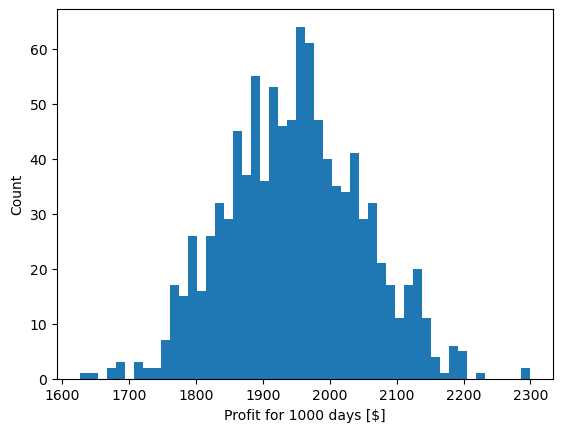

In [13]:
profits_many_items = run_simulation_many_items()
plt.hist(profits_many_items, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

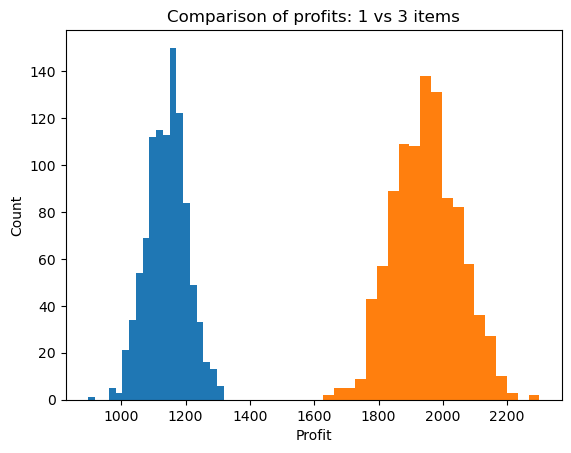

In [14]:
plt.title("Comparison of profits: 1 vs 3 items")
plt.hist(profits, bins = 20)
plt.hist(profits_many_items, bins = 20)
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

### ** Problem 5. Monte Carlo Simulation
One common technique to apply simulations is called **Monte Carlo simulation**. It's similar to the simulation from the previous example. The main idea is to use random sampling to solve deterministic problems.

Research what these simulations are. Give examples. Implement at least one case of a Monte Carlo simulation. You can use the following checklist to help with your research and work:
* What is a simulation?
    * How is simulation used in science?
    * Why is a simulation useful?
* How are statistics useful in simulation? How can we simulate unknown, random processes?
* What is a Monte Carlo simulation (also known as "Monte Carlo method")?
* A common use of Monte Carlo methods is numeric integration
    * Define the problem. Propose the solution. Implement it and test with some common functions
    * How does this method compare to other methods, e.g. the trapezoidal rule? Compare the performance (accuracy and time to execute) of both methods
* Apply Monte Carlo simulation to a real-life system. There are many examples. You can see [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications) or some other resource for inspiration.

### ** Problem 6. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)